# MATH 210 Introduction to Mathematical Computing

## November 5, 2018

* Gaussian elimination and matrices for row operations
* Application: interpolation

In [1]:
import numpy as np
import scipy.linalg as la

## Gaussian elimination

Notice that in SciPy there is no function like `rref` in MATLAB. Let's make our own functions to do the basic row operations:

1. Add row to another.
2. Scale a row.
3. Switch rows.

Let's write a function called `add_rows` which takes 4 input parameters `A`, `k`, `i`, and `j` and returns the matrix that results from adding `k` times row `i` to row `j`. We don't want to change the data in the input matrix `A`. We want to return a new matrix. And so we create a copy using the `.copy()` method at the beginning of our function.

In [2]:
def add_rows(A,k,i,j):
    M = A.copy()
    M[j,:] = k*M[i,:] + M[j,:]
    return M

In [3]:
A = np.array([[1,1],[1,-1]])
add_rows(A,1,0,1)

array([[1, 1],
       [2, 0]])

In [4]:
A = np.array([[1,1,1],[1,-1,0]])
add_rows(A,1,0,1)

array([[1, 1, 1],
       [2, 0, 1]])

Let's write a function called `scale_row` which takes 3 input parameters `A`, `k`, and `i` and returns the matrix that results from `k` times row `i`. Again we don't want to change the data in the input matrix A. We want to return a new matrix. And so we create a copy using the .copy() method at the beginning of our function.

In [5]:
def scale_row(A,k,i):
    M = A.copy()
    M[i,:] = k*M[i,:]
    return M

In [6]:
A = np.array([[1,1,1],[1,-1,0]])
scale_row(A,5,1)

array([[ 1,  1,  1],
       [ 5, -5,  0]])

Let's write a function called `switch_rows` which takes 3 input parameters `A`, `i` and `j` and returns the matrix that results switch rows `i` and `j`. Let's do this by creating a [permutation matrix](https://en.wikipedia.org/wiki/Elementary_matrix#Elementary_row_operations) for this row operation.

In [7]:
def switch_rows(A,i,j):
    n = A.shape[0]
    E = np.eye(n)
    E[i,i] = 0
    E[j,j] = 0
    E[i,j] = 1
    E[j,i] = 1
    return E @ A

In [8]:
A = np.array([[1,1,1],[1,-1,0]])
M = switch_rows(A,0,1)

In [9]:
M

array([[ 1., -1.,  0.],
       [ 1.,  1.,  1.]])

## Gaussian elimination

Let's apply our functions to a matrix `M` to find its row echelon form.

In [10]:
M = np.array([[5,4,2],[-1,2,1],[1,1,1]])

In [11]:
la.det(M)

7.0

In [12]:
M

array([[ 5,  4,  2],
       [-1,  2,  1],
       [ 1,  1,  1]])

This is a nonsigular matrix and so it has rank 3.

In [13]:
E1 = switch_rows(M,0,2)
E1

array([[ 1.,  1.,  1.],
       [-1.,  2.,  1.],
       [ 5.,  4.,  2.]])

In [14]:
E2 = add_rows(E1,1,0,1)
E2

array([[ 1.,  1.,  1.],
       [ 0.,  3.,  2.],
       [ 5.,  4.,  2.]])

In [15]:
E3 = add_rows(E2,-5,0,2)
E3

array([[ 1.,  1.,  1.],
       [ 0.,  3.,  2.],
       [ 0., -1., -3.]])

In [16]:
E4 = switch_rows(E3,1,2)
E4

array([[ 1.,  1.,  1.],
       [ 0., -1., -3.],
       [ 0.,  3.,  2.]])

In [17]:
E5 = scale_row(E4,-1,1)
E5

array([[ 1.,  1.,  1.],
       [-0.,  1.,  3.],
       [ 0.,  3.,  2.]])

In [18]:
E6 = add_rows(E5,-3,1,2)
E6

array([[ 1.,  1.,  1.],
       [-0.,  1.,  3.],
       [ 0.,  0., -7.]])

In [19]:
E7 = scale_row(E6,-1/7,2)
E7

array([[ 1.,  1.,  1.],
       [-0.,  1.,  3.],
       [-0., -0.,  1.]])

## Interpolation

Now that we have the skills to create matrices and solve linear systems, let's do some examples.

Say we have $n$ points in the xy-plane: $\{ (x_i,y_i)\}_{i=1}^n$. Let's find the unique degree $n-1$ polynomial which interpolates all the points:

\begin{align*}
a_{n-1}x_1^{n-1} + \dots + a_2 x_1^2 + a_1x_1 + a_0 &= y_1 \\
a_{n-1}x_2^{n-1} + \dots + a_2 x_2^2 + a_1x_2 + a_0 &= y_2 \\
\dots &= \dots \\
a_{n-1}x_n^{n-1} + \dots + a_2 x_n^2 + a_1x_n + a_0 &= y_n
\end{align*}

The coefficients $a_{n-1}$, $a_{n-2}$, $\dots$, $a_0$ are the solution of $Ax=b$ where $A$ is the vandermont matrix:

\begin{bmatrix}
x_1^{n-1} & x_1^{n-2} & \dots & x_1 & 1 \\
x_2^{n-1} & x_2^{n-2} & \dots & x_2 & 1 \\
\dots & \dots & & & \\
x_n^{n-1} & x_n^{n-2} & \dots & x_n & 1 \\
\end{bmatrix}

and $b = [y_1, y_2, \dots, y_n]^T$.

Let's do a simple example. We know that $y=x^2$ is the unique degree 2 polynomial that interpolates $(-1,1)$, $(0,0)$ and $(1,1)$.

In [20]:
xs = np.array([-1,0,1])
ys = np.array([1,0,1])
A = np.column_stack([xs**2,xs,np.ones(3)])

In [21]:
A

array([[ 1., -1.,  1.],
       [ 0.,  0.,  1.],
       [ 1.,  1.,  1.]])

We expect the solution $[1,0,0]^T$.

In [22]:
x = la.solve(A,ys)

In [23]:
x

array([ 1.,  0.,  0.])

Success! Now let's interpolate 10 random points:

In [24]:
N = 10
xs = np.arange(0,N)
ys = np.random.randint(0,10,N)

Let's plot them:

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

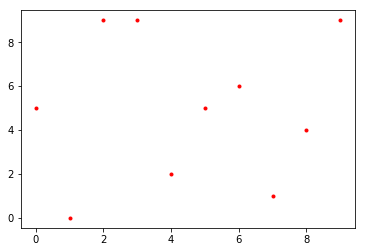

In [26]:
plt.plot(xs,ys,'r.')
plt.show()

Create the Vandermonde matrix:

In [27]:
A = np.column_stack([xs**(N-k-1) for k in range(0,N)])

In [28]:
A[:3,:3]

array([[  0,   0,   0],
       [  1,   1,   1],
       [512, 256, 128]])

We could also use the NumPy function [numpy.vander](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.vander.html):

In [29]:
A = np.vander(xs)

In [30]:
A[:3,:3]

array([[  0,   0,   0],
       [  1,   1,   1],
       [512, 256, 128]])

In [31]:
an = la.solve(A,ys)

In [32]:
an

array([  8.54276896e-04,  -3.62847222e-02,   6.44113757e-01,
        -6.18229167e+00,   3.46359954e+01,  -1.13826563e+02,
         2.08221021e+02,  -1.84954861e+02,   5.64980159e+01,
         5.00000000e+00])

Let's plot the interpolation:

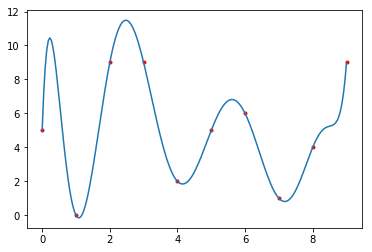

In [33]:
x = np.linspace(0,N-1,200)
y = sum([an[k]*x**(N-k-1) for k in range(0,N)])
plt.plot(xs,ys,'r.',x,y)
plt.show()

Success! But notice how unstable the curve is. That's why it better to use [cubic spline](https://en.wikipedia.org/wiki/Spline_(mathematics)) to interpolate a large number of points.